# Basic tools for resampling

These are a few basic scripts for generating some random data and then resampling it. This is just to familiarize you with the syntax for generating random data sets, and randomly resampling from the data. It doesn't explain *why* we're doing those things - that's what the workshop is for. 

To install new python packages, I strongly recommend using `pip` (for Mac users. Windows users can use `setuptools` but I can't help you there). `Pip` is probably already installed (and you use it from the command line/terminal): 

`> pip install packageName`

If it's not installed, see [here](https://pip.pypa.io/en/stable/installing/) for info. 

This file is a Jupyter/ipython notebook (`.ipnb`). It allows for python scripts to be interspersed with text, like these instructions. To install Jupyter, run 

`> pip install jupyter` 

To launch the notebook viewer to you can use it interactively (instead of viewing it like an html file), run the following from the folder where you've downloaded the workshop materials. 

`> jupyter notebook`

Simply use the menu bar in the Jupyter viewer window to open the file. 

### Import packages

In [2]:
import random, numpy as np, pandas as pd
%matplotlib inline

### Generate random data

`np.random.normal(mean,sd,N)` draws N samples from the normal distribution with given mean and standard deviation. We will also be using other distributions, such as `np.random.beta` or `np.random.poisson`. 

In [13]:
distribution1 = np.random.normal(3, 2, 20)
print('distribution1 mean: {}, sd: {}'.format(np.mean(distribution1), np.std(distribution1)))

distribution2 = np.random.normal(3, 2, 20)
print('distribution2 mean: {}, sd: {}'.format(np.mean(distribution2), np.std(distribution2)))

distribution3 = np.random.normal(4, 3, 20)
print('distribution3 mean: {}, sd: {}'.format(np.mean(distribution3), np.std(distribution3)))

distribution1 mean: 2.77417176661678, sd: 1.8215701606646382
distribution2 mean: 2.518310777106641, sd: 1.4594789959500907
distribution3 mean: 4.057209565744219, sd: 2.8029870408528046


We want to learn more about these distributions. Since we created them, we know that `distribution1` and `distribution2` are sampled from the same distribution, and that `distribution3` isn't. Rerun the above code a few times to see how they change (place the cursor in the script window and hit shift+enter, or press the play button in the menu bar). It's quite possible that, occasionally, the mean for `distribution3` will be lower than one of the others. 

### Resampling 

To understand the distributions better, we resample repeatedly, with replacement. 

One resampling looks like the following, where `np.random.choice(list, N, replace=True)` resamples N times from array or other list-like object `list`. By default, `replace=True`, which is what we will need for bootstrapping. 

In [14]:
newSample = np.random.choice(distribution1, len(distribution1))
print('newSample mean: {}, sd: {}'.format(np.mean(newSample), np.std(newSample)))

newSample mean: 3.017086378560047, sd: 2.2217014218801423


Note that the `newSample` mean and standard deviation are unlikely to be exactly the same as for `distribution1`. So instead of resampling once, let's resample lots of times (here, 10000)! Create an empty list `resampleMeans` to store these values. 

In [15]:
resampleMeans = []
for _ in range(10000):
    newSample = np.random.choice(distribution1, len(distribution1))
    newSampleMean = np.mean(newSample)
    resampleMeans.append(newSampleMean)
    
print('resampleSampleMeans mean: {}, sd: {}'.format(np.mean(resampleMeans), np.std(resampleMeans)))

resampleSampleMeans mean: 2.773800956140057, sd: 0.4047030144725058


The _ in the script above doesn't mean anything special. It's just common practice to indicate a variable that we don't actually care about - we don't need to do anything with that variable later, it's just for counting to 10000. We could just as well have written `for i in range(10000)` 

Note two things. First, the mean printed above is close to that of `distribution1` (if you reran the script for generating `distribution1`, you may need to rerun the above script). However, the standard deviation is far away. Wait for the workshop for an explanation! 

The above resampling script is written out fairly explicitly (for ease of reading). But to be able to do the same resampling for other data without having to manually replace the variable names each time, we create a custom function. The following all do the same thing, but the second uses a list comprehension (which are one of the most wonderful things in python - see [here](http://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/)).

In [16]:
def resample1(data):
    resampleMeans = []
    for _ in range(10000):
        resampleMeans.append(np.mean(np.random.choice(data, len(data))))
    return resampleMeans

def resample2(data):
    resampleMeans = [np.mean(np.random.choice(data, len(data))) for _ in range(10000)]
    return(resampleMeans)

print(np.mean(resample1(distribution1)))
print(np.mean(resample2(distribution1)))

2.76972039807
2.77432205312


Becase we might be interested in things other than means, we can generalize this by using two functions, one for resampling and the other for extracting whatever variable we're interested in

In [17]:
def resample(data):
    bootData = [myFunction(np.random.choice(data, len(data))) for _ in range(10000)]
    return(bootData)

def myFunction(resampledData):
    return(np.nanmean(resampledData))

resampled1 = resample(distribution1)
resampled2 = resample(distribution2)
resampled3 = resample(distribution3)
print(np.mean(resampled1))
print(np.mean(resampled2))
print(np.mean(resampled3))

2.76679566614
2.51596394429
4.05582908762


### Plotting

Finally, let's plot the resampled data. 

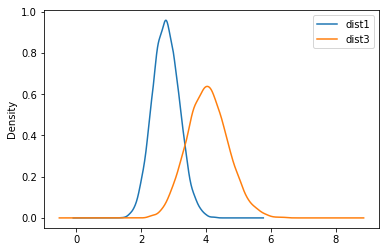

In [18]:
df = pd.DataFrame({'dist1':resampled1,'dist3':resampled3})
df.plot(kind='density')

And the original data.

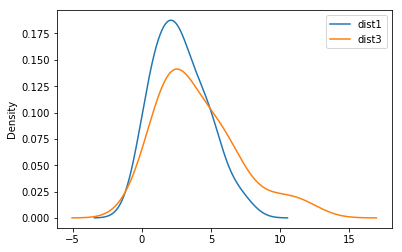

In [19]:
df = pd.DataFrame({'dist1':distribution1, 'dist3':distribution3})
df.plot(kind='density')